# Can we predict music's popularity using classification algorithms?

The aim of this project is to determine whether it is possible to predict with high precision how popular a song would be based purely on the song's demographics. Some of the criteria that will be used in evaluating this question are music loudness, acousticness, danceability, duration, etc. Multiple classification models will be used, scored, tuned and then compared to one another to determine what is the best model to determine a song's popularity going forward.



## 01 Introduction

I have a very personal relationship to music and am very interested in the music industry itself (i.e. what are some of the driving forces behind certain songs being popular) so I thought that it would be really interesting to see what are some of the key features that make certain song more popular than others. Since my perception of what popopular music is might actually turn out to be different from what the data suggests. 

## 02 Import Relevant Modules

In [1]:
# import relevant modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell #This package and the command below allow for the Jupyter notebook
#to print all the outputs and NOT just the final row
InteractiveShell.ast_node_interactivity = "all" #this command allows all outputs to be printed, not just the last command

## 03 Data Wrangling
This dataset comes directly from Kaggle and can be found by using the following link https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

In [2]:
# import the spotify dataset
df = pd.read_csv(r'C:\Users\MarceloFuentes\Documents\Springboard\Research Project - Spotify Data\spotify_archive\data.csv')

In [3]:
df.head()

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH          0.000028   
4       166693   0.193         0  4d6HGyGT8e121BsdKmw9v6          0.000002   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096     1   
1    7     0.160   -12.441     1   
2    3     0.101   -14.850     1   
3    5     0.381    -9.316     1   
4    3     0.229   -10.096     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   
2                                          Gati Bali           5         1921   
3                                          Danny Boy           3         1921   
4                        When Irish Eyes Are Smiling           2         1921   

   speechiness    tempo  
0       0.0366   80.954  
1       0.4150   60.936  
2       0.0339  110.339  
3       0.0354  100.109  
4       0.0380  101.665

Based on quick observation this data is quite clean, however the one column that might need a bit of cleaning up is the "artists" field. However, since the purpose of this analysis will be to use numerical data, one-hot encoding every single artist would create an overfitted model, therefore we will bypass this step and work without cleaning this data set any further.  

## 04 Exploratory Data Analysis

In [4]:
df.head()

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH          0.000028   
4       166693   0.193         0  4d6HGyGT8e121BsdKmw9v6          0.000002   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096     1   
1    7     0.160   -12.441     1   
2    3     0.101   -14.850     1   
3    5     0.381    -9.316     1   
4    3     0.229   -10.096     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   
2                                          Gati Bali           5         1921   
3                                          Danny Boy           3         1921   
4                        When Irish Eyes Are Smiling           2         1921   

   speechiness    tempo  
0       0.0366   80.954  
1       0.4150   60.936  
2       0.0339  110.339  
3       0.0354  100.109  
4       0.0380  101.665

In [5]:
# Perform a count of unique artists in the dataset
unique_artists = df['artists'].unique()
unique_artists = [x for x in unique_artists]
unique_artists = pd.DataFrame(unique_artists)
len(unique_artists)
len(df)
songs_per_artist = int(len(df)/len(unique_artists))
print('This list has '+str(len(df))+' songs and there is approximately '+str(songs_per_artist)+' songs per artist.')

34088

170653

This list has 170653 songs and there is approximately 5 songs per artist.


Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

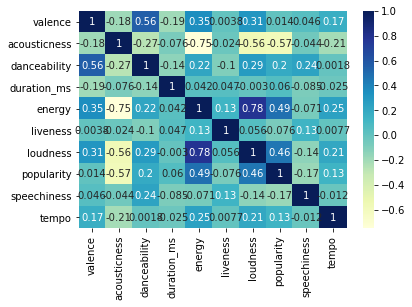

In [6]:
#Correlation matrix for variables, first make a smaller dataframe with numerical values only
df.columns
df_for_corr_matrix = df[['valence','acousticness','danceability',
       'duration_ms', 'energy','liveness', 'loudness','popularity',
       'speechiness', 'tempo']]
corr = df_for_corr_matrix.corr()
ax = sns.heatmap(corr,cmap="YlGnBu", annot=True)

<Figure size 864x720 with 0 Axes>

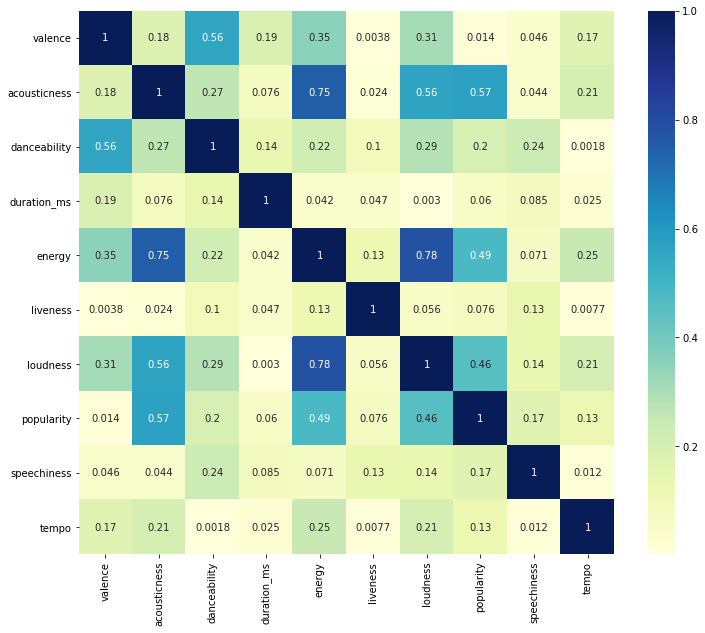

In [7]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(abs(corr),cmap="YlGnBu", annot=True)

## Findings on correlation matrix
Based on this graph, some of the variables that appear to have the highest level of correlations are:

1) Energy and Acousticness = ~ -(0.75)

2) Energy and Loudness = ~ 0.78

3) Loudness and Acousticness = ~ (0.56)

4) Popularity and Acousticness = ~ (0.57)

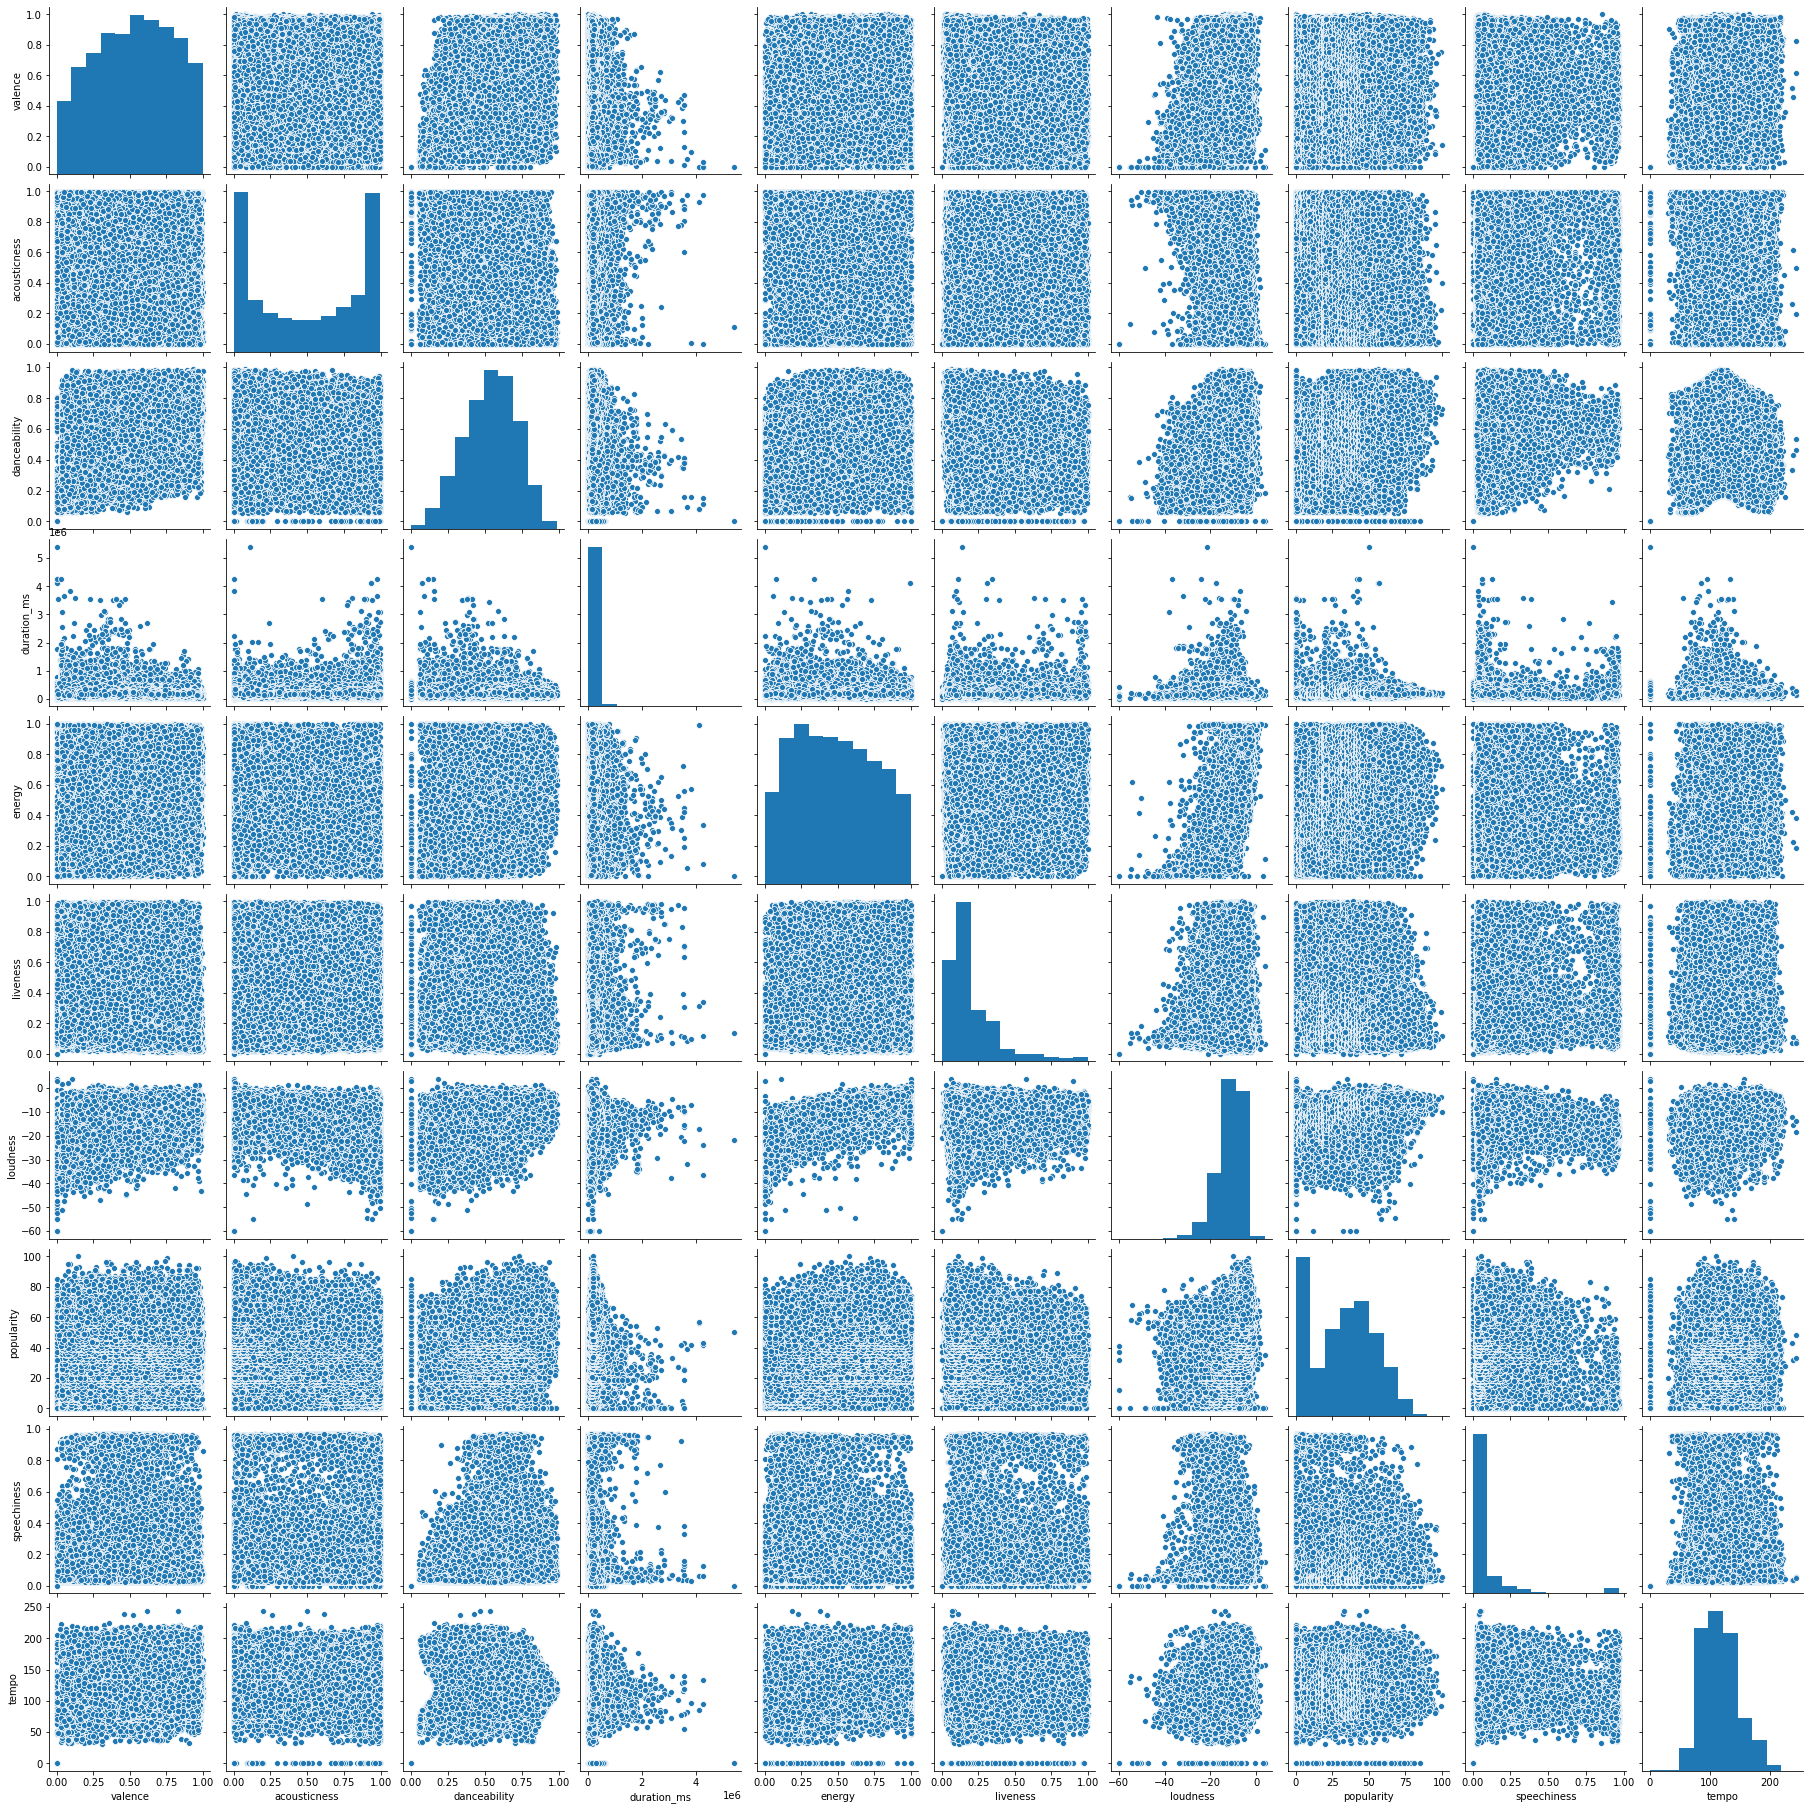

In [8]:
sns.pairplot(df_for_corr_matrix)

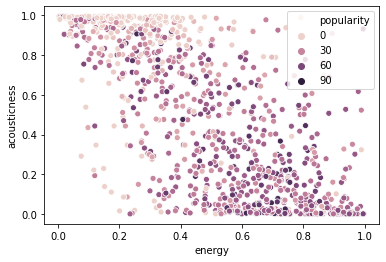

In [11]:
#Comparing Acousticness and Energy using a scatter plot, the negative relationship between variables is clear
df_scatter = pd.DataFrame()
df_scatter['acousticness'] = df['acousticness']
df_scatter['popularity'] = df['popularity']
df_scatter['energy'] = df['energy']
scatter_1 = sns.scatterplot(data=df_scatter.sample(1000), y='acousticness', x='energy', hue='popularity')

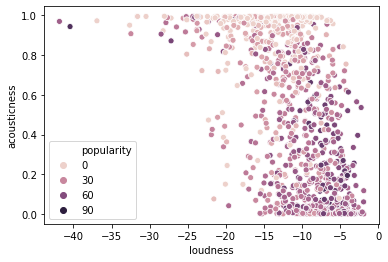

In [12]:
# Comparing Acousticness and Energy using a scatter plot, the negative relationship between variables is clear
df_scatter = pd.DataFrame()
df_scatter['acousticness'] = df['acousticness']
df_scatter['popularity'] = df['popularity']
df_scatter['loudness'] = df['loudness']
scatter_1 = sns.scatterplot(data=df_scatter.sample(1000), y='acousticness', x='loudness', hue='popularity')

# Insights so far
- Music popularity typically decreases the higher the music's acousticness and increases with lower acousticness
- Lower levels of loudness are also associated with more popular music and the louder the music the lower the popularity

Text(0.5, 0, '$loudness$')

Text(0.5, 0, '$acousticness$')

Text(0.5, 0, '$popularity$')

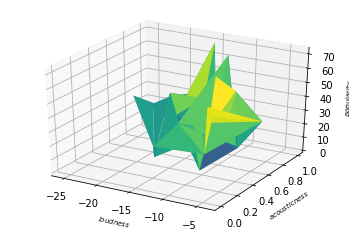

In [13]:
df_scatter = pd.DataFrame()
df_scatter['acousticness'] = df['acousticness']
df_scatter['popularity'] = df['popularity']
df_scatter['loudness'] = df['loudness']
df_scatter = df_scatter.sample(50) 
ax = plt.axes(projection='3d')
ax.plot_trisurf(df_scatter['loudness'], df_scatter['acousticness'], df_scatter['popularity'],
                cmap='viridis', edgecolor='none')
#(X, Y, Z)
ax.set_xlabel('$loudness$', fontsize=7)
ax.set_ylabel('$acousticness$', fontsize=7)
ax.set_zlabel('$popularity$', fontsize=7)

Text(0.5, 0, '$loudness$')

Text(0.5, 0, '$energy$')

Text(0.5, 0, '$popularity$')

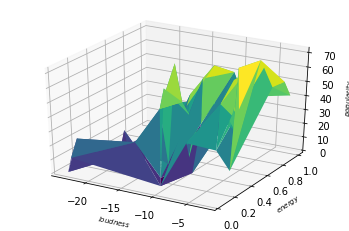

In [14]:
df_scatter = pd.DataFrame()
df_scatter['energy'] = df['energy']
df_scatter['popularity'] = df['popularity']
df_scatter['loudness'] = df['loudness']
df_scatter = df_scatter.sample(50) 
ax = plt.axes(projection='3d')
ax.plot_trisurf(df_scatter['loudness'], df_scatter['energy'], df_scatter['popularity'],
                cmap='viridis', edgecolor='none')
#(X, Y, Z)
ax.set_xlabel('$loudness$', fontsize=7)
ax.set_ylabel('$energy$', fontsize=7)
ax.set_zlabel('$popularity$', fontsize=7)

As a final step we will plot the average and median song popularity which we will use to determine popular vs. unpopular music later on if and when we decide to use regression models 

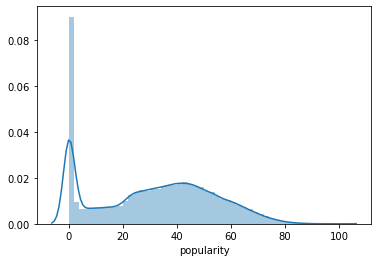

In [15]:
ax = sns.distplot(pd.to_numeric(df['popularity']))

In [16]:
from scipy import stats
median_pop = np.median(df['popularity'])
mean_pop = np.mean(df['popularity'])
print('The median popularity is '+str(int(median_pop)))
print('The mean popularity is '+str(int(mean_pop)))

The median popularity is 33
The mean popularity is 31


# Conclusions from EDA
Based on the graph above there is incontrovertible evidence that we would be able to use a combination of variables to forecast the popularity of difference songs using variables such as energy, loudness and acousticness which have very high correlations with one another and with the popularity variable itself.  

## 05 Preprocessing & Feature Engineering

In [17]:
#First we will create a new variable that is more discrete to bins the popularity ranges. Based on our distribution above
#we can split it based on quintiles using pandas cut function
bottom_00 = df['popularity'].quantile(0.0)
bottom_20 = df['popularity'].quantile(0.2)
bottom_40 = df['popularity'].quantile(0.4)
bottom_60 = df['popularity'].quantile(0.6)
bottom_80 = df['popularity'].quantile(0.8)
bottom_100 = df['popularity'].quantile(1)
print("The minimum value is "+str(bottom_00))
print("The bottom quintile has a value of "+str(bottom_20))
print("The 2nd bottom quintile has a value of "+str(bottom_40))
print("The 2nd top quintile has a value of "+str(bottom_60))
print("The 1st top quintile has a value of "+str(bottom_80))
print("The maximum value is "+str(bottom_100))

The minimum value is 0.0
The bottom quintile has a value of 4.0
The 2nd bottom quintile has a value of 27.0
The 2nd top quintile has a value of 39.0
The 1st top quintile has a value of 51.0
The maximum value is 100.0


In [18]:
df['quantile_popularity'] = pd.qcut(df['popularity'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=False,
                            precision=0)
df['quantile_popularity'] = df['quantile_popularity']+1
print(df[['popularity','quantile_popularity']].sample(30))

        popularity  quantile_popularity
162150          19                    2
39233            0                    1
168477          42                    4
104075          47                    4
162251          28                    3
62963           25                    2
167170          42                    4
151010          37                    3
33748           61                    5
12782           45                    4
5560            12                    2
44467           21                    2
86243           41                    4
43172           11                    2
99712           27                    2
28774           51                    4
96394           24                    2
132559          30                    3
74632           71                    5
44975           16                    2
27309           32                    3
145424          23                    2
158667          10                    2
79774           20                    2


Now are data has been broken down into quintiles and bucketed under its respectives tagging (i.e. 1 = bottom quintile, 2=2nd bottom quintile, 3=3rd bottom quintile, 4=2nd top quintile, 5=1st top quintile) 

In [19]:
#The next step is to get rid of our unneccesary variables
df_analysis = df[['valence', 'year', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'explicit', 'instrumentalness',
       'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'quantile_popularity']]
df_analysis.head()

valence  year  acousticness  danceability  duration_ms  energy  explicit  \
0   0.0594  1921         0.982         0.279       831667   0.211         0   
1   0.9630  1921         0.732         0.819       180533   0.341         0   
2   0.0394  1921         0.961         0.328       500062   0.166         0   
3   0.1650  1921         0.967         0.275       210000   0.309         0   
4   0.2530  1921         0.957         0.418       166693   0.193         0   

   instrumentalness  liveness  loudness  mode  speechiness    tempo  \
0          0.878000     0.665   -20.096     1       0.0366   80.954   
1          0.000000     0.160   -12.441     1       0.4150   60.936   
2          0.913000     0.101   -14.850     1       0.0339  110.339   
3          0.000028     0.381    -9.316     1       0.0354  100.109   
4          0.000002     0.229   -10.096     1       0.0380  101.665   

   quantile_popularity  
0                    1  
1                    2  
2                    2  
3                    1  
4                    1

In [32]:
# Now we can split our data into training and test groups
from sklearn.model_selection import train_test_split
X = df_analysis.loc[:, df_analysis.columns != 'quantile_popularity']
y = df_analysis['quantile_popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## 06 Model evaluation

### 06_01 K-Nearest Neighbors

In [25]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,21):

    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=10)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=12)

KNeighborsClassifier(n_neighbors=13)

KNeighborsClassifier(n_neighbors=14)

KNeighborsClassifier(n_neighbors=15)

KNeighborsClassifier(n_neighbors=16)

KNeighborsClassifier(n_neighbors=17)

KNeighborsClassifier(n_neighbors=18)

KNeighborsClassifier(n_neighbors=19)

KNeighborsClassifier(n_neighbors=20)

<Figure size 864x360 with 0 Axes>

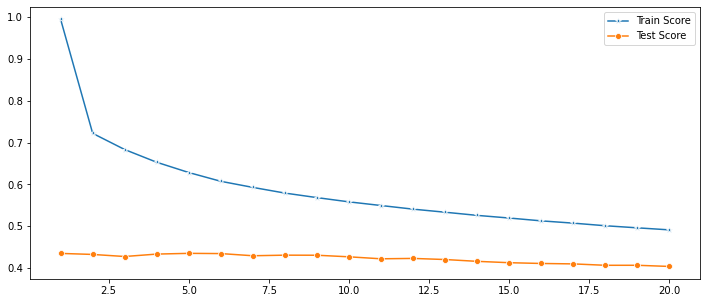

In [26]:
# Plot the model performance based on the number of neighbors
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,21),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,21),test_scores,marker='o',label='Test Score')

In [27]:
# Based on the graph above we will decide to use 20 neighbors for this analysis
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [28]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

Text(0.5, 1.0, 'Confusion matrix, without normalization')

Confusion matrix, without normalization
[[4477 1725  564  237  100]
 [1903 2805 1270  712  196]
 [ 713 1712 1672 1539  824]
 [ 437 1109 1427 1986 1870]
 [ 220  617 1077 2096 2843]]


Text(0.5, 1.0, 'Normalized confusion matrix')

Normalized confusion matrix
[[0.63029706 0.24285513 0.07940307 0.03336618 0.01407856]
 [0.27635783 0.40734824 0.18443218 0.1033982  0.02846355]
 [0.11037152 0.26501548 0.25882353 0.23823529 0.12755418]
 [0.0639918  0.16239567 0.20896178 0.29081857 0.27383219]
 [0.03210273 0.09003356 0.15715745 0.30585145 0.41485481]]


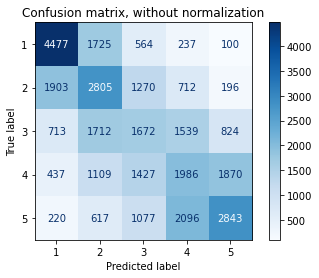

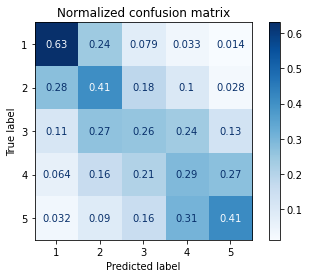

In [29]:
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.58      0.63      0.60      7103
           2       0.35      0.41      0.38      6886
           3       0.28      0.26      0.27      6460
           4       0.30      0.29      0.30      6829
           5       0.49      0.41      0.45      6853

    accuracy                           0.40     34131
   macro avg       0.40      0.40      0.40     34131
weighted avg       0.40      0.40      0.40     34131



The accuracy of this model is around 40% which is not a great figure to start with. However, hopefully after we perform some hyperparameter tuning we can bring this figure a bit higher for this specific model. 

In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,26)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

KeyboardInterrupt: 

In [ ]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

After performing a GridSearch the model appears to show that the best parameter is 5 nearest neighbors and the best score possible is 0.423. So far this model might not be the top choice.

### 06_02 Random Forest Classifier

In [37]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from sklearn.ensemble import RandomForestClassifier

In [38]:
# Scale the data
from sklearn import preprocessing
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [39]:
clf = RandomForestClassifier(n_estimators=300, random_state = 42,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.639
Random Forest: f1-score=0.640


(array([[7103., 6886., 6460., 6829., 6853.],
        [7688., 6693., 8221., 6504., 5025.]]),
 array([1, 2, 3, 4, 5, 6]),
 <a list of 2 Lists of Patches objects>)

Text(0.5, 1.0, 'Random Forest y_test vs y_pred')

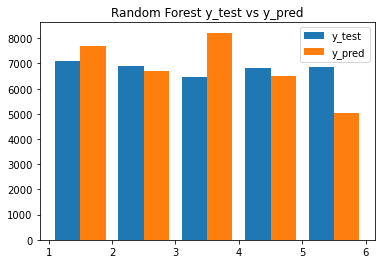

In [45]:
bins = [1,2,3,4,5,6]
colors = ['y_test','y_pred']
plt.hist([y_test,y_pred], bins=bins, stacked=False, label=colors)
plt.title("Random Forest y_test vs y_pred")
plt.legend(prop={'size': 10})
plt.show()

### Plot Feature Importances

13


13

<Figure size 720x720 with 0 Axes>

<BarContainer object of 13 artists>

([<matplotlib.axis.YTick at 0x15aa1c73ee0>,
 [Text(0, 0, 'explicit'),
  Text(0, 0, 'mode'),
  Text(0, 0, 'instrumentalness'),
  Text(0, 0, 'tempo'),
  Text(0, 0, 'liveness'),
  Text(0, 0, 'valence'),
  Text(0, 0, 'danceability'),
  Text(0, 0, 'speechiness'),
  Text(0, 0, 'duration_ms'),
  Text(0, 0, 'energy'),
  Text(0, 0, 'loudness'),
  Text(0, 0, 'acousticness'),
  Text(0, 0, 'year')])

Text(0.5, 0, 'Relative Importance')

Text(0.5, 1.0, 'Variable Importance')

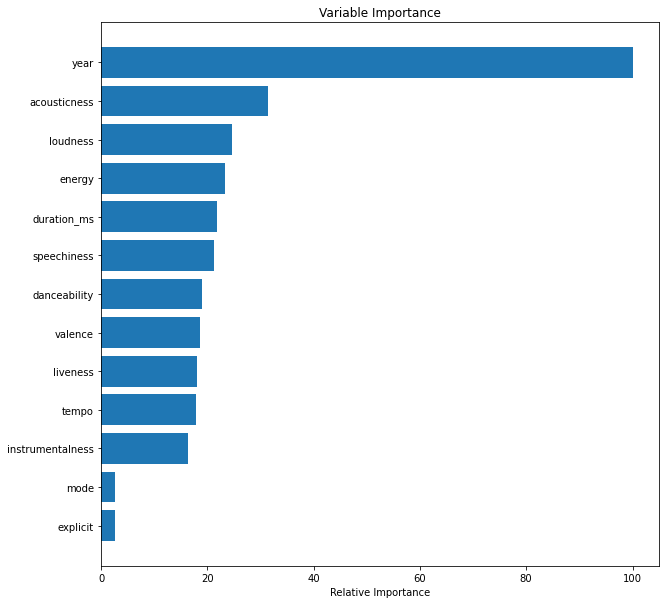

In [47]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Conclusions so far
The random forest classifier appears to perform better than k-NN, with 64% accuracy, additionally it appears the year in which a song is released is of great importance for the random forest classifier, which intuitively makes sense. Music tends to be most relevant and popular the more recent it is!

### 06_03 Logistic Regression
First I need to redefine the popularity variable to make it binomial (i.e. 1s and 0s) then I need to need to redefine my variables and scale them before running the logistic regression

In [85]:
# We need to redefine the popularity variable
# Recall - the popularity quintiles were as follows bottom 3 quintiles 1-3
# Top 2 quintiles 4-5. Therefore we will deem the top 2 quintiles as popular
# and the bottom 3 as nils
df['popular_or_not'] = pd.qcut(df['popularity'],
                            q=[.6, 1],
                            labels=False,
                            precision=0)
df['popular_or_not'] = df['popular_or_not'].replace(0, 1)
df['popular_or_not'] = df['popular_or_not'].fillna(0)
print(df[['popularity','quantile_popularity','popular_or_not']].sample(50))

        popularity  quantile_popularity  popular_or_not
167720          57                    5             1.0
3524            16                    2             0.0
162950          20                    2             0.0
104621          37                    3             0.0
125781           0                    1             0.0
144659          15                    2             0.0
169961          55                    5             1.0
35269           61                    5             1.0
29823           47                    4             1.0
115670          30                    3             0.0
162343          29                    3             0.0
37432           66                    5             1.0
136096          43                    4             1.0
58098            0                    1             0.0
106386          43                    4             1.0
53848           53                    5             1.0
109184           0                    1         

In [87]:
# The x values will remain the same but the X will come from "popular_or_not"
from sklearn.model_selection import train_test_split
X = df_analysis.loc[:, df_analysis.columns != 'quantile_popularity']
y = df['popular_or_not']

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X.values,y.values,random_state=42)

# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(Xlr)
X_train_scaled=scaler.transform(Xlr)
X_test_scaled=scaler.transform(Xtestlr)


clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(X_train_scaled, ylr)
# Print the accuracy from the testing data.
print("The logistic regression accuracy score is "+
      str(accuracy_score(clf.predict(X_test_scaled), ytestlr)))

LogisticRegression()

The logistic regression accuracy score is 0.8415525970373149


The unoptimized logistic regression has an accuracy of around 84% which is quite high! However, we should note that this regression is using a simple version of the data which is split between 1s and 0s. Therefore this model should be used but noting that the output it different from the prior two.

In [94]:
# Use the function below for logistic regression optimization
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [98]:
clf = LogisticRegression()
score = cv_score(clf, Xlr, ylr)
print("The logistic regression score without data scaling is "+str(score))

The logistic regression score without data scaling is 0.6362339421496452


The next step is to use different C values as arguments to find the ideal one that optimizes our model.

In [110]:
#the grid of parameters to search over
Cs = [0.01, 0.1, 1, 5, 7.5, 10, 100,]

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
best_score = 0

# your turn
for x in Cs:
    clf = LogisticRegression(C=x)
    score = cv_score(clf, X_train_scaled, ylr)
    print(x, score)
    if score > best_score:
        best_score = score
        ideal_x = x
        
print("The ideal C value is "+str(ideal_x)+" with a score of "+str(best_score))

0.01 0.8428067956741417
0.1 0.8428146048164809
1 0.8428536712841833
5 0.8428536715894186
7.5 0.8428536715894186
10 0.8428536715894186
100 0.8428458584790194
The ideal C value is 5 with a score of 0.8428536715894186


The ideal C value is 5 with a score of 84.29% in terms of accuracy. So far this is the highest score we have obtained after scaling the data!

In [115]:
logreg = LogisticRegression(C=5)
logreg.fit(X_train_scaled,ylr)
y_pred = logreg.predict(X_test_scaled)
print(logreg.score(X_test_scaled, ytestlr))

LogisticRegression(C=5)

0.8415525970373149


(array([[24902.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0., 17762.],
        [25228.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0., 17436.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 Lists of Patches objects>)

Text(0.5, 1.0, 'Logistic Regression ytestlr vs y_pred')

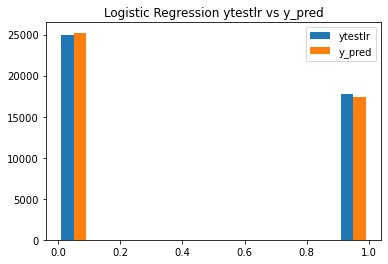

In [123]:
colors = ['ytestlr','y_pred']
plt.hist([ytestlr,y_pred], stacked=False, label=colors)
plt.title("Logistic Regression ytestlr vs y_pred")
plt.legend(prop={'size': 10})
plt.show()

In [158]:
# feature importance for logistic regression
feature_names = X_train.columns
importance = clf.fit(X_train_scaled, ylr).coef_[0]
#summarize feature importance
for i, v in enumerate(importance):
    print('Feature: '+feature_names[i]+' Score: %.5f' % (v))
    
# feature_importance = clf.feature_importances_
# # make importances relative to max importance
# feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
# sorted_idx = np.argsort(feature_importance)[:30]

# pos = np.arange(sorted_idx.shape[0]) + .5
# print(pos.size)
# sorted_idx.size
# plt.figure(figsize=(10,10))
# plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, X.columns[sorted_idx])
# plt.xlabel('Relative Importance')
# plt.title('Variable Importance')
# plt.show()

Feature: valence Score: 0.03734
Feature: year Score: 2.65311
Feature: acousticness Score: 0.01034
Feature: danceability Score: -0.00915
Feature: duration_ms Score: 0.00599
Feature: energy Score: -0.19850
Feature: explicit Score: 0.10141
Feature: instrumentalness Score: -0.16017
Feature: liveness Score: -0.09468
Feature: loudness Score: 0.30227
Feature: mode Score: -0.04325
Feature: speechiness Score: -0.26754
Feature: tempo Score: -0.02020


Similar to the prior models, the most important feature is the year! Again, this does not come to us as a surprise since more recent songs are likely to be more popular, yet it is interesting to see that this variable is consistently important!